In [1]:
!wget https://github.com/CSP-GD/notes/raw/master/practice/file_format/gltf%E6%A0%BC%E5%BC%8F%E8%A7%A3%E6%9E%90/gltf-tools.ipynb -O gltf-tools.ipynb
%run ./gltf-tools.ipynb

--2020-05-05 05:34:23--  https://github.com/CSP-GD/notes/raw/master/practice/file_format/gltf%E6%A0%BC%E5%BC%8F%E8%A7%A3%E6%9E%90/gltf-tools.ipynb
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CSP-GD/notes/master/practice/file_format/gltf%E6%A0%BC%E5%BC%8F%E8%A7%A3%E6%9E%90/gltf-tools.ipynb [following]
--2020-05-05 05:34:24--  https://raw.githubusercontent.com/CSP-GD/notes/master/practice/file_format/gltf%E6%A0%BC%E5%BC%8F%E8%A7%A3%E6%9E%90/gltf-tools.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10155 (9.9K) [text/plain]
Saving to: ‘gltf-tools.ipynb’

gltf-tools.ipynb    100%[=============

In [2]:
!wget https://raw.githubusercontent.com/tensorflow/lucid/master/lucid/misc/gl/glcontext.py -O glcontext.py
from glcontext import create_opengl_context

--2020-05-05 05:34:26--  https://raw.githubusercontent.com/tensorflow/lucid/master/lucid/misc/gl/glcontext.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3866 (3.8K) [text/plain]
Saving to: ‘glcontext.py’

glcontext.py        100%[===================>]   3.78K  --.-KB/s    in 0s      

2020-05-05 05:34:27 (57.1 MB/s) - ‘glcontext.py’ saved [3866/3866]



In [3]:
!wget https://github.com/CSP-GD/notes/raw/master/practice/file_format/gltf%E6%A0%BC%E5%BC%8F%E8%A7%A3%E6%9E%90/mesh/cube.glb -O cube.glb
glb_file = open('./cube.glb', 'rb')
glb_bytes = glb_file.read()
model, buffers = glTF_tools.glb_loader(glb_bytes)
model = glTF_tools.model_norm(model)

--2020-05-05 05:34:30--  https://github.com/CSP-GD/notes/raw/master/practice/file_format/gltf%E6%A0%BC%E5%BC%8F%E8%A7%A3%E6%9E%90/mesh/cube.glb
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CSP-GD/notes/master/practice/file_format/gltf%E6%A0%BC%E5%BC%8F%E8%A7%A3%E6%9E%90/mesh/cube.glb [following]
--2020-05-05 05:34:30--  https://raw.githubusercontent.com/CSP-GD/notes/master/practice/file_format/gltf%E6%A0%BC%E5%BC%8F%E8%A7%A3%E6%9E%90/mesh/cube.glb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2280 (2.2K) [application/octet-stream]
Saving to: ‘cube.glb’

cube.glb            100%[=================

In [4]:
glTF_tools.render_JSON(model)

##### Copyright 2018 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Using OpenGL with Colab Cloud GPUs

This notebook demonstrates obtaining OpenGL context on GPU Colab kernels.

In [0]:
!pip install -q moviepy

In [6]:
!pip install PyGLM

In [0]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import PIL
import glm


In [8]:
# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 640, 480
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 418.67'
b'NVIDIA Corporation'


In [0]:
vert = """
#version 330

// 物件預設頂點位置
layout (location = 0) in vec3 POSITION;

// 物件預設法向量
layout (location = 1) in vec3 NORMAL;

layout (location = 2) in vec2 TEXCOORD_0;

layout (location = 3) in vec4 JOINTS_0;

layout (location = 4) in vec4 WEIGHTS_0;

// 物件姿態矩陣
uniform mat4 u_Posture;
// 鏡頭焦距
uniform mat4 u_Projection;
// 鏡頭姿態矩陣
uniform mat4 u_Camera;

void main(){
    gl_Position = u_Projection * u_Camera * u_Posture * vec4(POSITION, 1);
}
"""

In [0]:
frag = """
#version 330

out vec4 color;

void main() {
    color = vec4(1.0, 1.0, 0.0, 1.0);
}
"""

In [0]:
from OpenGL.GL import shaders
main_program = shaders.compileProgram(
        shaders.compileShader(
            vert,
            gl.GL_VERTEX_SHADER
        ),
        shaders.compileShader(
            frag,
            gl.GL_FRAGMENT_SHADER
        )
    )

gl.glUseProgram(main_program)

In [0]:
def create_vbo(gl, buffer_view, buffer):
    buffer = buffers[buffer_view.get("buffer")]

    target = buffer_view.get("target")
    byte_offset = buffer_view.get("byteOffset")
    byte_length = buffer_view.get("byteLength")

    vbo = gl.constants.GLuint()
    gl.glCreateBuffers(1, gl.ctypes.pointer(vbo))
    gl.glBindBuffer(
        target,
        vbo
    )
    
    gl.glBufferData(
        target,
        byte_length,
        buffer[byte_offset:byte_offset+byte_length],
        gl.GL_STATIC_DRAW
    )

    gl.glBindBuffer(
        target,
        0
    )
    return vbo


In [0]:
def set_vertex_attribute(gl, program, attrib_name, accessor, buffer_view):
    attribute = gl.glGetAttribLocation(program, attrib_name)

    if attribute != -1:
        type2sizes = {
            "SCALAR": [1],
            "VEC2": [2],
            "VEC3": [3],
            "VEC4": [4],
            "MAT2": [2, 2],
            "MAT3": [3, 3, 3],
            "MAT4": [4, 4, 4, 4]
        }

        stride = buffer_view.get("byteStride")

        componentType = accessor.get("componentType")
        # glTF 的標準中並未提及 normalized 屬性，因此預設成 False
        normalize = False
        byte_offset = accessor.get("byteOffset")

        sizes = type2sizes[accessor["type"]]

        for idx,size in enumerate(sizes):
            gl.glEnableVertexAttribArray(attribute + idx)
            gl.glVertexAttribPointer(
                attribute + idx,
                size,
                componentType,
                normalize,
                stride,
                byte_offset
            )


In [0]:
def create_mesh(gl, program, mesh, model, vbos):
    vaos = []
    indices = []
    
    primitives = model["meshes"][mesh]["primitives"]
    for primitive in primitives:
        vao = gl.constants.GLuint()
        gl.glCreateVertexArrays(1, gl.ctypes.pointer(vao))
        gl.glBindVertexArray(vao)
        for attrib_name in primitive["attributes"].keys():
            accessor = model.get("accessors")[primitive.get("attributes")[attrib_name]]
            buffer_view = model.get("bufferViews")[accessor.get("bufferView")]
            gl.glBindBuffer(
                gl.GL_ARRAY_BUFFER,
                vbos[accessor.get("bufferView")]
            )
            set_vertex_attribute(gl, program, attrib_name, accessor, buffer_view)

        gl.glBindBuffer(
            gl.GL_ELEMENT_ARRAY_BUFFER,
            vbos[primitive.get("indices")]
        )
        gl.glBindVertexArray(gl.constants.GLuint(0))
        vaos.append(vao)
        indices.append(model.get("accessors")[primitive.get("indices")])
    return vaos, indices

In [41]:
vbos = []
for buffer_view in model["bufferViews"]:
    vbos.append(create_vbo(gl, buffer_view, buffers[buffer_view.get("buffer")]))

mesh_vaos, mesh_indices = create_mesh(gl, main_program, 0, model, vbos)
mesh_vaos, mesh_indices

([c_uint(4)],
 [{'bufferOffset': 0,
   'bufferView': 3,
   'componentType': 5123,
   'count': 36,
   'type': 'SCALAR'}])

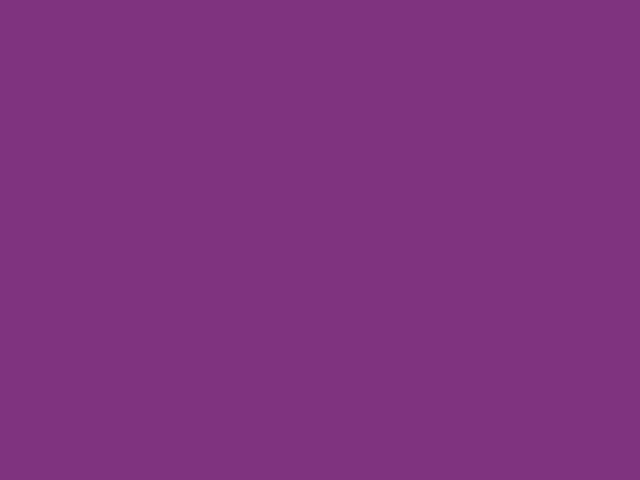

In [67]:
import math
# Clear to black, fully opaque
gl.glClearColor(0.5, 0.2, 0.5, 1.0)
# Clear everything
gl.glClearDepth(1.0) 
# Enable depth testing
gl.glEnable(gl.GL_DEPTH_TEST)
# Near things obscure far things
gl.glDepthFunc(gl.GL_LEQUAL)

gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glBindVertexArray(mesh_vaos[0])

fieldOfView = 45 * math.pi / 180 # in radians
aspect = WIDTH / HEIGHT
zNear = 0
zFar = 1000.0
projectionMatrix = \
glm.perspective(
    fieldOfView,
    aspect,
    zNear,
    zFar
)
gl.glUniformMatrix4fv(
    gl.glGetUniformLocation(
        main_program,
        "u_Projection"
    ),
    1,
    False,
    projectionMatrix.to_list()
)

cameraMatrix = \
glm.translate(
    glm.mat4(),
    glm.vec3(0.0, 0.0, 6.0)
)

gl.glUniformMatrix4fv(
    gl.glGetUniformLocation(
        main_program,
        "u_Camera"
    ),
    1,
    False,
    cameraMatrix.to_list()
)

gl.glUniformMatrix4fv(
    gl.glGetUniformLocation(
        main_program,
        "u_Posture"
    ),
    1,
    False,
    glm.mat4().to_list()
)

gl.glDrawElements(
    gl.GL_TRIANGLES, 
    mesh_indices[0].get("count"),
    mesh_indices[0].get("componentType"),
    gl.constants.GLvoidp(0)
)


img_buf = gl.glReadPixels(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
PIL.Image.fromarray(img)

##  Render ShaderToy videos on GPU

We now have the full power of modern OpenGL in our hands! Let's do something interesting with it!

Fetching the source and rendering the [amaizing shader](https://www.shadertoy.com/view/Xtf3Rn) by Kali from [ShaderToy](https://www.shadertoy.com/view/Xtf3Rn). You can also  substitute a different `shader_id`, but note that only single-pass shaders that don't use textures are supported by the code below.

In [0]:
shader_id = 'Xtf3Rn'  # https://www.shadertoy.com/view/Xtf3Rn

shader_json = !curl -s 'https://www.shadertoy.com/shadertoy' \
  -H 'Referer: https://www.shadertoy.com/view/$shader_id' \
  --data 's=%7B%20%22shaders%22%20%3A%20%5B%22$shader_id%22%5D%20%7D'
shader_data = json.loads(''.join(shader_json))[0]

assert len(shader_data['renderpass']) == 1, "Only single pass shareds are supported"
assert len(shader_data['renderpass'][0]['inputs']) == 0,  "Input channels are not supported"

shader_code = shader_data['renderpass'][0]['code']

In [0]:
import PIL

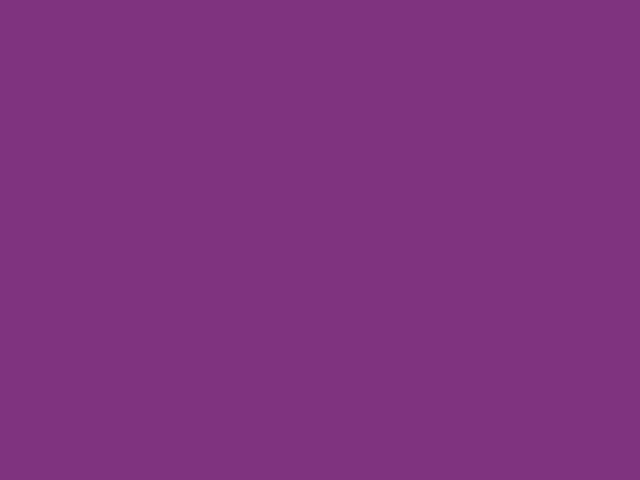

In [20]:
from OpenGL.GL import shaders

vertexPositions = np.float32([[-1, -1], [1, -1], [-1, 1], [1, 1]])
VERTEX_SHADER = shaders.compileShader("""
#version 330
layout(location = 0) in vec4 position;
out vec2 UV;
void main()
{
  UV = position.xy*0.5+0.5;
  gl_Position = position;
}
""", gl.GL_VERTEX_SHADER)

FRAGMENT_SHADER = shaders.compileShader("""
#version 330
out vec4 outputColor;
in vec2 UV;

uniform sampler2D iChannel0;
uniform vec3 iResolution;
vec4 iMouse = vec4(0);
uniform float iTime = 0.0;
""" + shader_code + """
void main()
{
    mainImage(outputColor, UV*iResolution.xy);
}

""", gl.GL_FRAGMENT_SHADER)

shader = shaders.compileProgram(VERTEX_SHADER, FRAGMENT_SHADER)


time_loc = gl.glGetUniformLocation(shader, 'iTime')
res_loc = gl.glGetUniformLocation(shader, 'iResolution')

def render_frame(time):
  gl.glClear(gl.GL_COLOR_BUFFER_BIT)
  with shader:
    gl.glUniform1f(time_loc, time)
    gl.glUniform3f(res_loc, WIDTH, HEIGHT, 1.0)
    
    gl.glEnableVertexAttribArray(0);
    gl.glVertexAttribPointer(0, 2, gl.GL_FLOAT, False, 0, vertexPositions)
    gl.glDrawArrays(gl.GL_TRIANGLE_STRIP, 0, 4)
  img_buf = gl.glReadPixels(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
  img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
  return img
PIL.Image.fromarray(render_frame(10.0))

Use [MoviePy](https://zulko.github.io/moviepy/) to generate a video.

In [21]:
clip = mvp.VideoClip(render_frame, duration=10.0)
clip.write_videofile('out.mp4', fps=60)
files.download('out.mp4')

[MoviePy] >>>> Building video out.mp4
[MoviePy] Writing video out.mp4


100%|█████████▉| 600/601 [00:05<00:00, 104.22it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: out.mp4 

